# aLund DCTR Fitting Ensembled over 120 Runs

In this notebook, we examine 120 seperate scans for fitting aLund, each using a different DCTR reweighter.

In [1]:
# standard library imports
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt

## Process Data

In [2]:
data_dir = '/global/cscratch1/sd/asuresh/data/aLundFitting/aLund_AltFit/'

In [3]:
thetas = np.linspace(0.5, 0.9, 9)

In [4]:
lvals_40 = np.empty((0, len(thetas)))
vlvals_40 = np.empty((0, len(thetas)))

lvals_80 = np.empty((0, len(thetas)))
vlvals_80 = np.empty((0, len(thetas)))

lvals_120 = np.empty((0, len(thetas)))
vlvals_120 = np.empty((0, len(thetas)))

lvals = np.empty((0, len(thetas)))
vlvals = np.empty((0, len(thetas)))

In [5]:
for i in range(40):
    file_label = data_dir +"DCTR_1D_aLund_Trial{}.npy".format((i))
    file = np.load(file_label)

    lvals_40 = np.append(lvals_40, np.expand_dims(file[:,0], axis = 0), axis = 0)
    vlvals_40 = np.append(vlvals_40, np.expand_dims(file[:,1], axis = 0), axis = 0)

In [6]:
for i in range(40):
    file_label = data_dir +"DCTR_1D_aLund_Trial{}.npy".format((i+40))
    file = np.load(file_label)

    lvals_80 = np.append(lvals_80, np.expand_dims(file[:,0], axis = 0), axis = 0)
    vlvals_80 = np.append(vlvals_80, np.expand_dims(file[:,1], axis = 0), axis = 0)

In [7]:
for i in range(40):
    file_label = data_dir +"DCTR_1D_aLund_Trial{}.npy".format((i+80))
    file = np.load(file_label)

    lvals_120 = np.append(lvals_120, np.expand_dims(file[:,0], axis = 0), axis = 0)
    vlvals_120 = np.append(vlvals_120, np.expand_dims(file[:,1], axis = 0), axis = 0)

In [8]:
for i in range(120):
    file_label = data_dir +"DCTR_1D_aLund_Trial{}.npy".format((i))
    file = np.load(file_label)

    lvals = np.append(lvals, np.expand_dims(file[:,0], axis = 0), axis = 0)
    vlvals = np.append(vlvals, np.expand_dims(file[:,1], axis = 0), axis = 0)

In [9]:
lvals_40_mean = np.mean(lvals_40, axis = 0)
vlvals_40_mean = np.mean(vlvals_40, axis = 0)

lvals_80_mean = np.mean(lvals_80, axis = 0)
vlvals_80_mean = np.mean(vlvals_80, axis = 0)

lvals_120_mean = np.mean(lvals_120, axis = 0)
vlvals_120_mean = np.mean(vlvals_120, axis = 0)

lvals_mean = np.mean(lvals, axis = 0)
vlvals_mean = np.mean(vlvals, axis = 0)

lvals_max = np.argmax(lvals, axis = 1)
vlvals_max = np.argmin(vlvals, axis = 1)

## Results

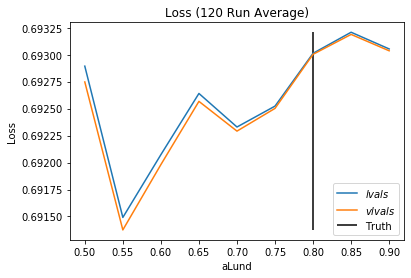

In [10]:
plt.title("Loss (120 Run Average)")

plt.plot(thetas, lvals_mean, label='$lvals$')
plt.plot(thetas, vlvals_mean, label='$vlvals$')

plt.vlines(
    0.8,
    min(np.concatenate([lvals_mean, vlvals_mean])),
    max(np.concatenate([lvals_mean, vlvals_mean])),
    label='Truth')

plt.xlabel("aLund")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("aLundEnsemble-Loss-120-Run-Average.png")
plt.show()

While the average curve's maximum is somewhat close to truth, we see that the overall trend does not follow the concave down shape we expect for fitting; the loss should have a strictly decreasing trend as aLund moves away from Truth.

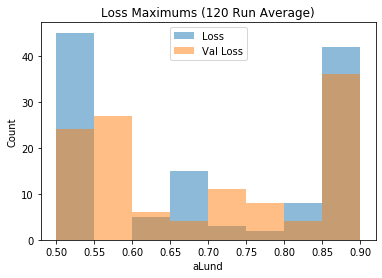

Loss Mean: 0.69
Loss Standard Deviation: 0.17
Validation Loss Mean: 0.69
Validation Loss Standard Deviation: 0.16


In [11]:
bins = np.linspace(0.5, 0.9, 9)
plt.title("Loss Maximums (120 Run Average)")

plt.hist(thetas[lvals_max], bins = bins, alpha = 0.5, label='Loss')
plt.hist(thetas[vlvals_max], bins = bins, alpha = 0.5, label='Val Loss')
plt.xlabel("aLund")
plt.ylabel("Count")

plt.legend()
# plt.savefig("aLundEnsemble-Loss-Maximums-120-Run-Average.png")
plt.show()

print("Loss Mean: {:.2f}".format(np.mean(thetas[lvals_max])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Loss Standard Deviation: {:.2f}".format(np.std(thetas[lvals_max])))

print("Validation Loss Mean: {:.2f}".format(np.mean(thetas[vlvals_max])))
print("Validation Loss Standard Deviation: {:.2f}".format(np.std(thetas[vlvals_max])))

Again, while the the truth value of 0.8 is within one standard deviation of the mean of loss maximum distribution, we see most of the maximums are concentrated toward the edges, which are far from truth. Additionally, the mean of this distribution does not match the peak of the average loss curve above.

## Individual Run Plots

We can see that the run to run variance for each curve is very large, illustrating that the fit is very specific to which DCTR rewighter we happen use.

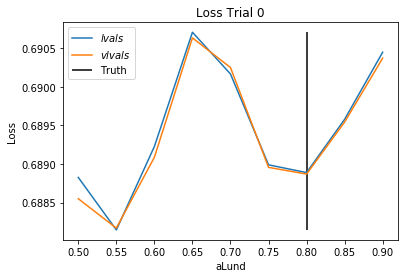

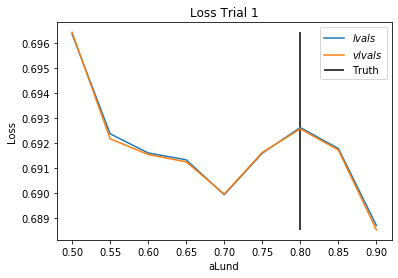

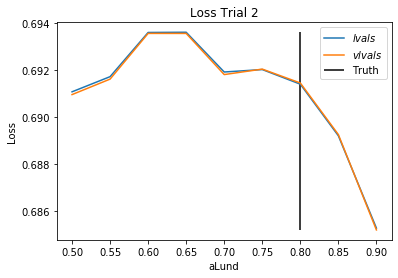

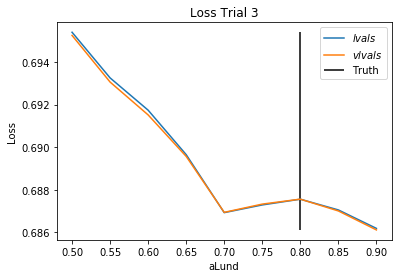

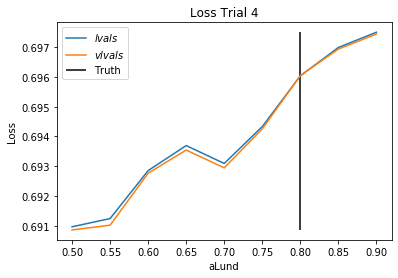

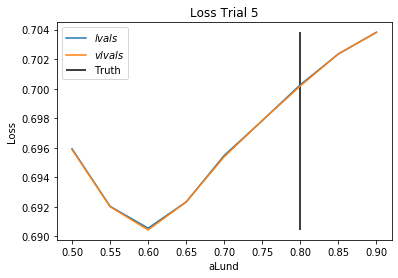

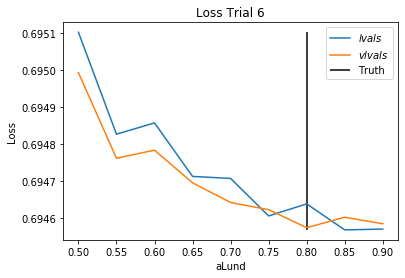

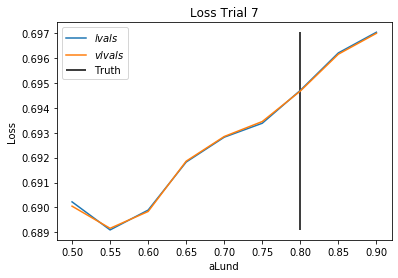

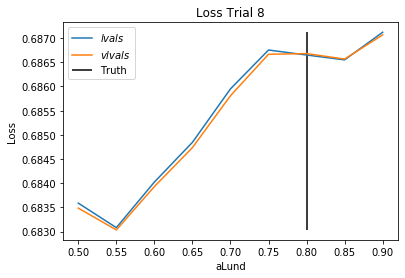

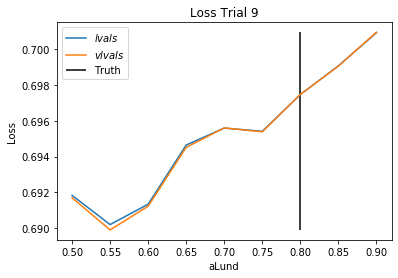

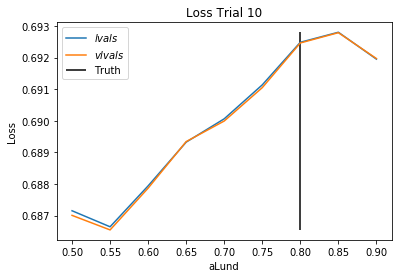

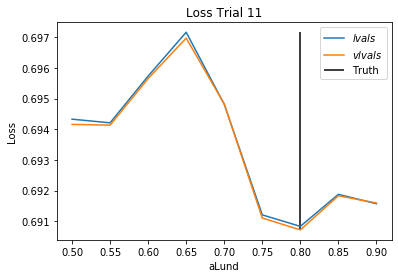

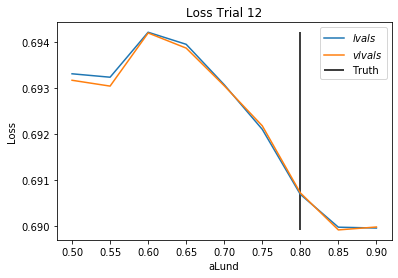

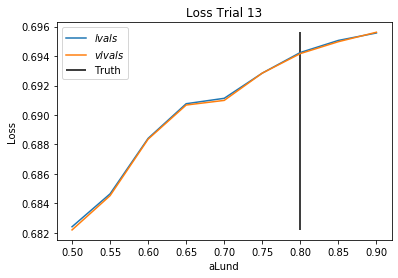

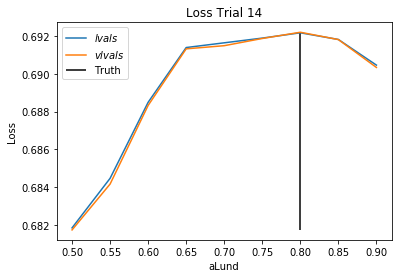

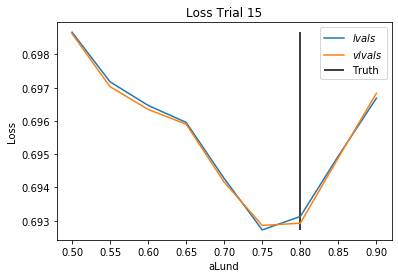

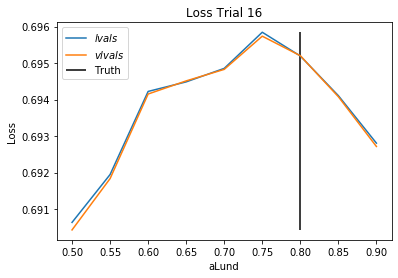

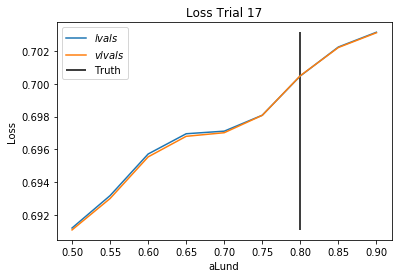

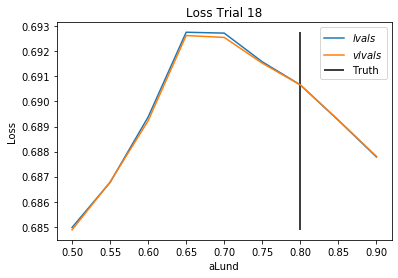

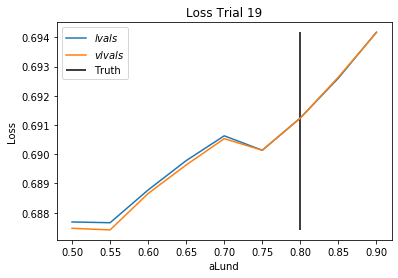

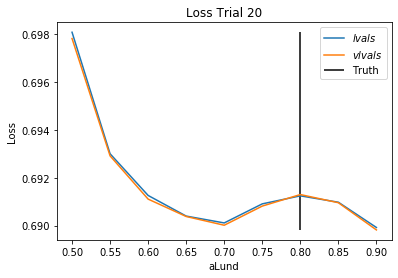

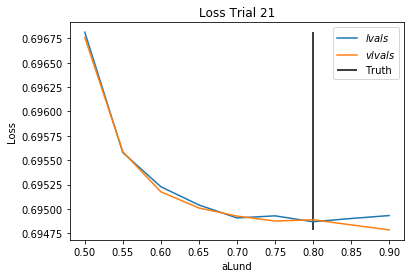

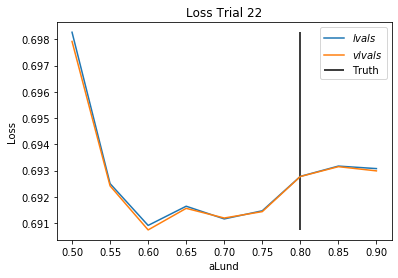

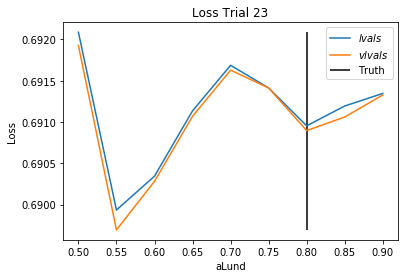

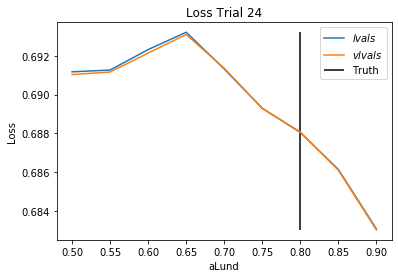

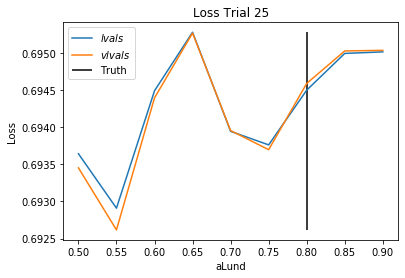

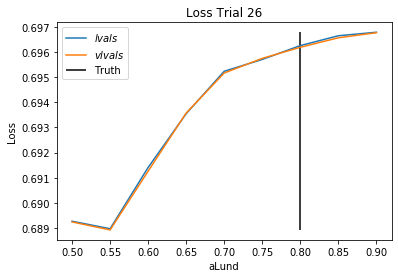

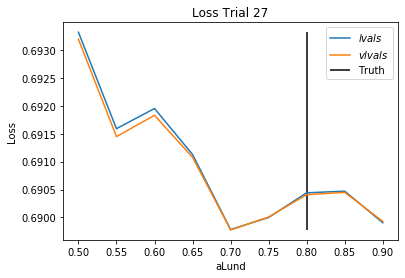

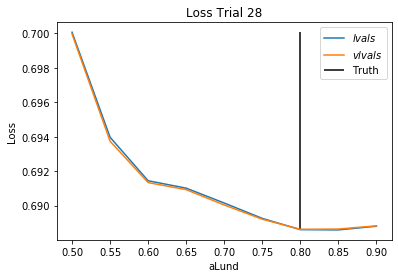

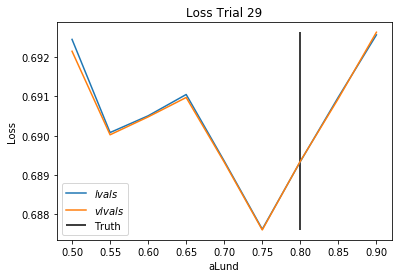

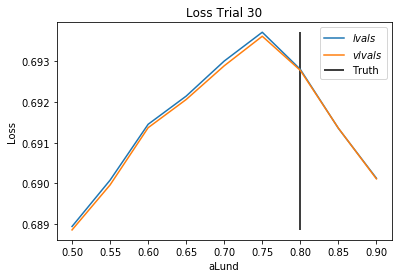

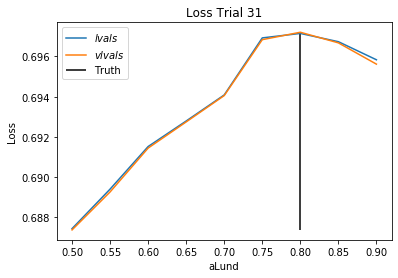

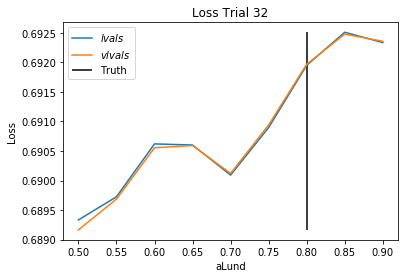

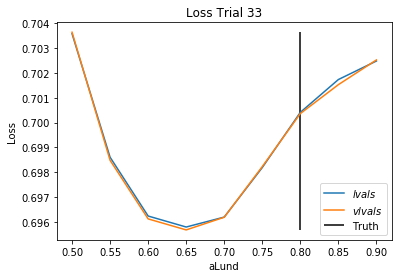

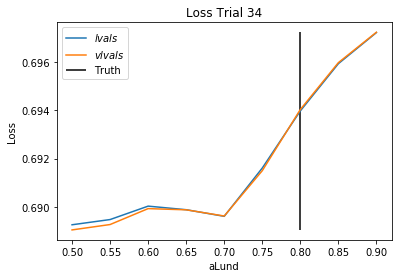

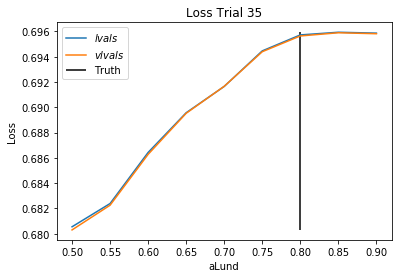

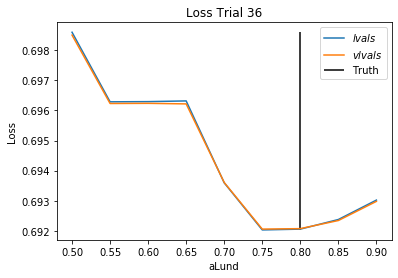

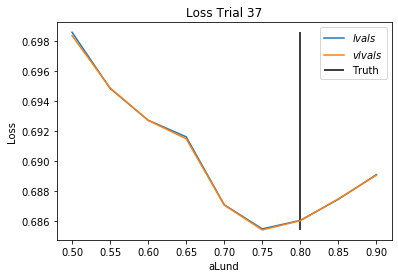

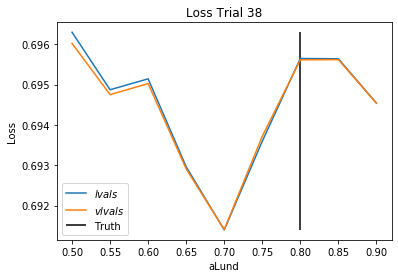

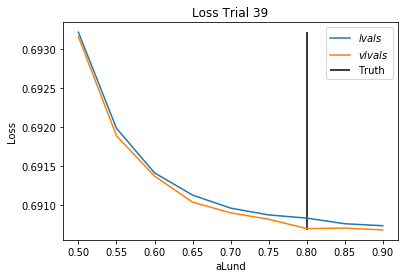

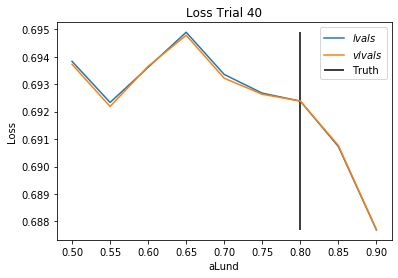

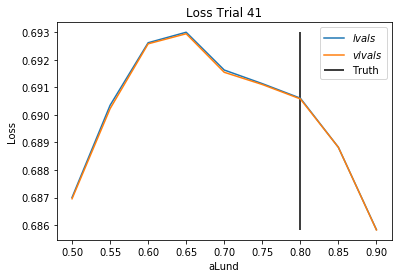

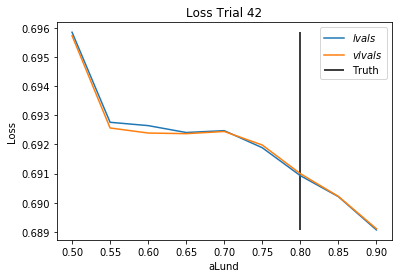

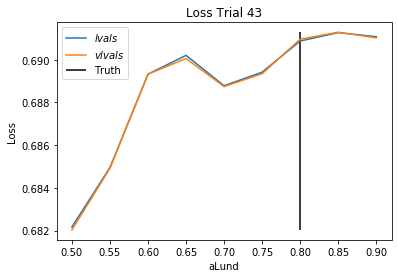

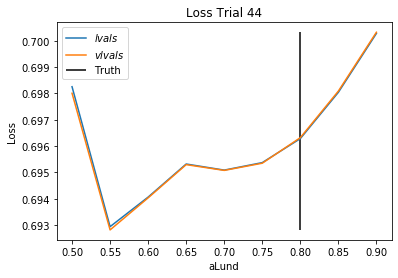

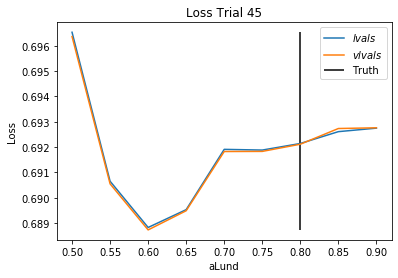

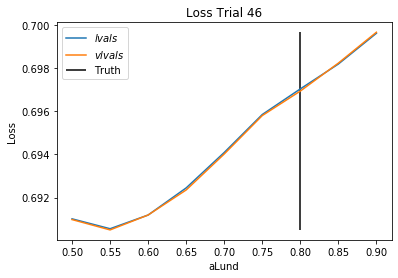

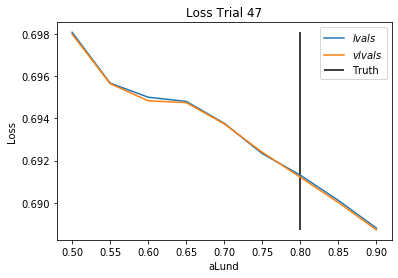

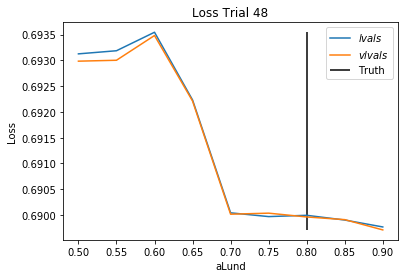

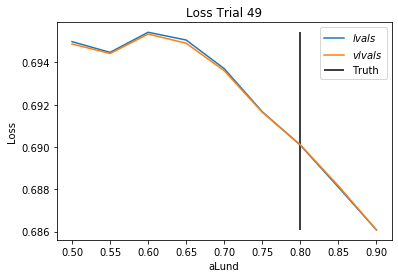

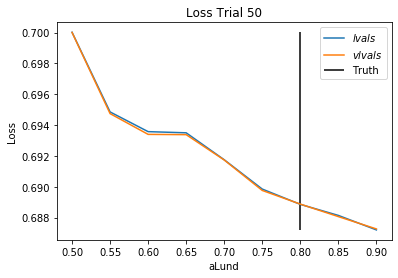

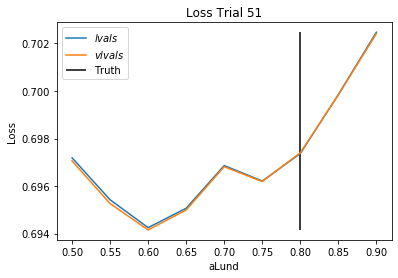

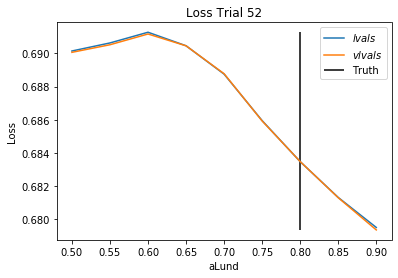

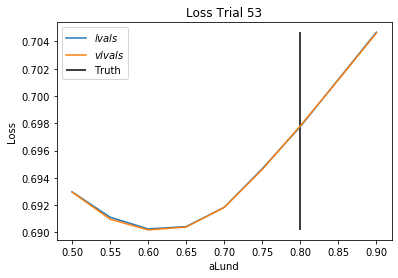

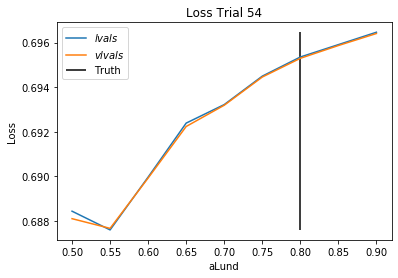

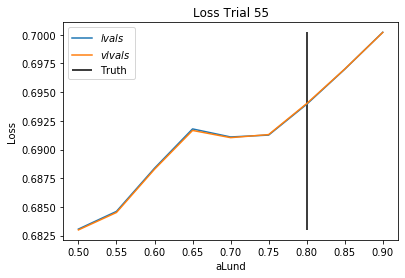

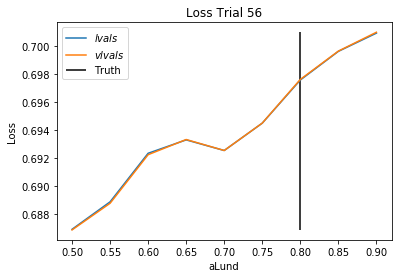

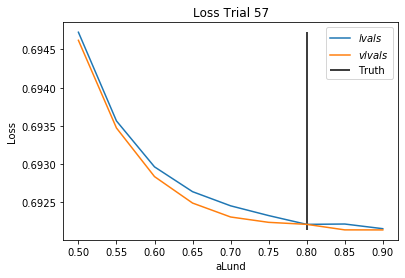

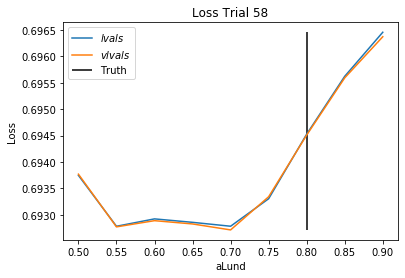

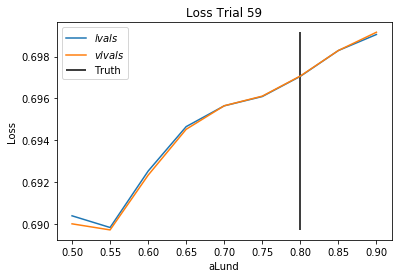

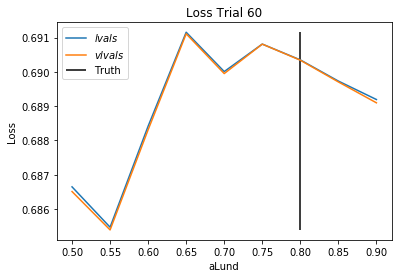

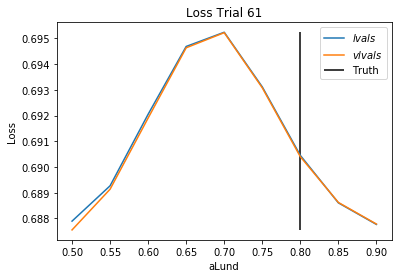

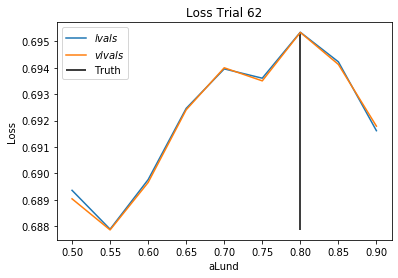

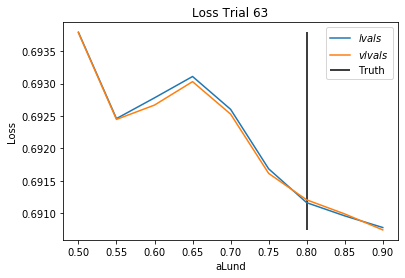

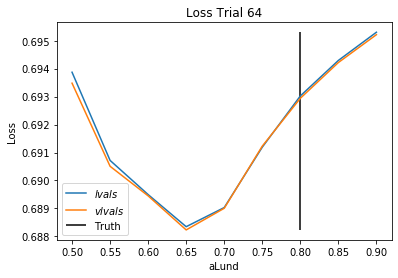

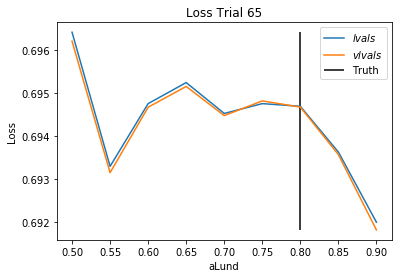

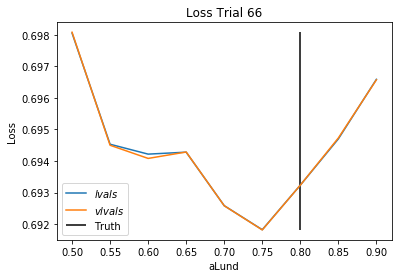

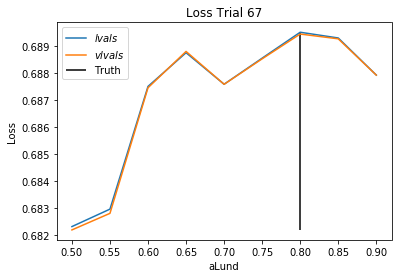

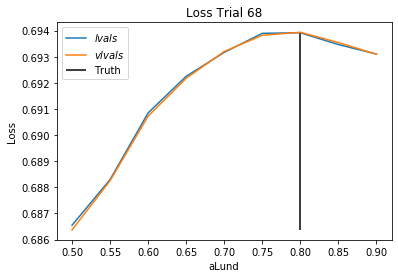

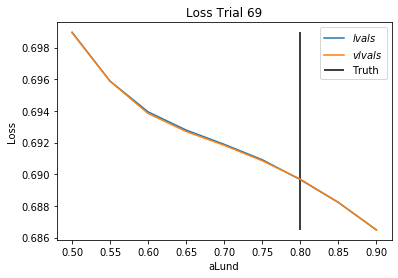

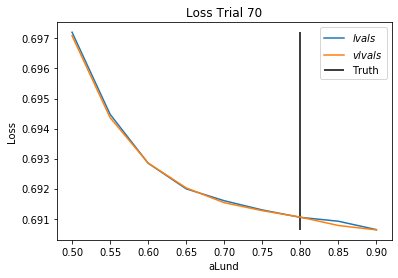

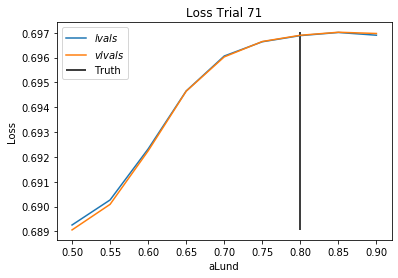

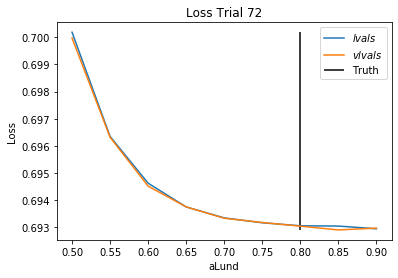

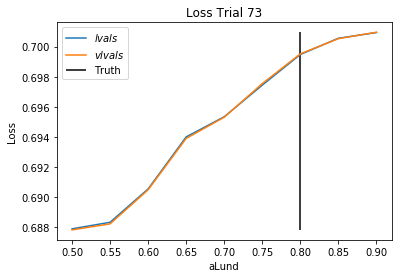

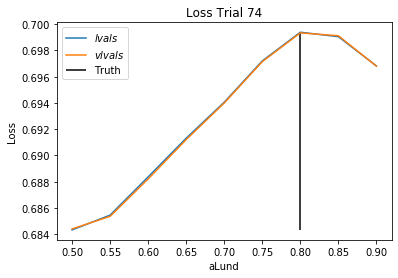

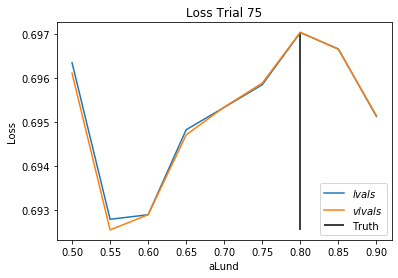

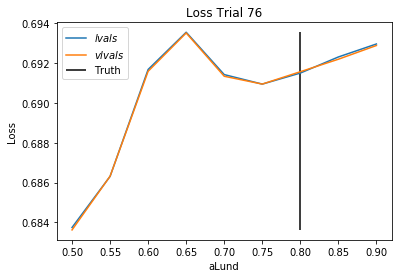

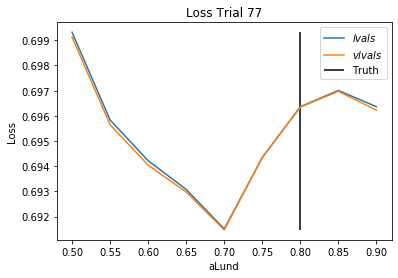

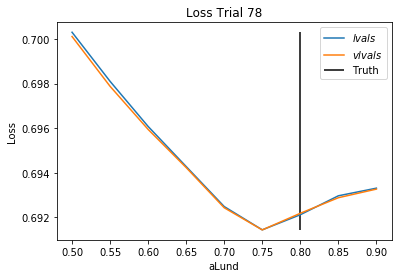

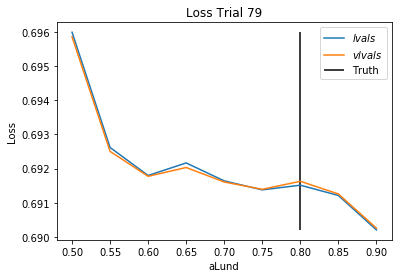

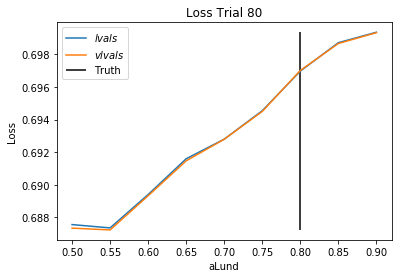

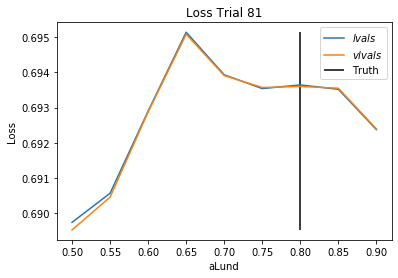

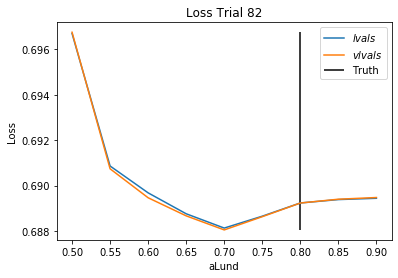

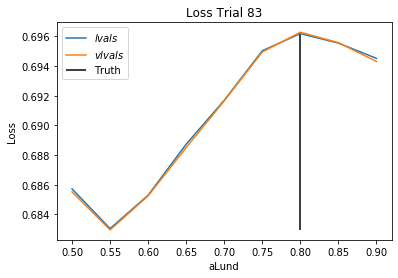

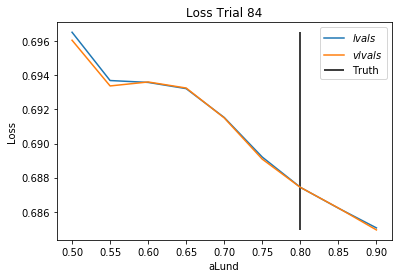

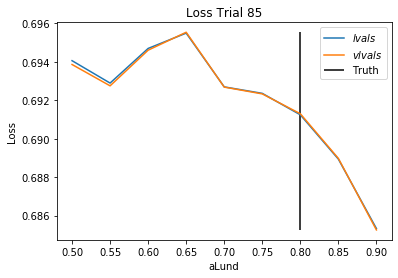

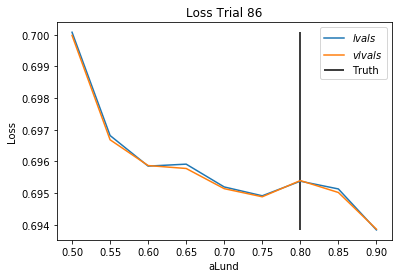

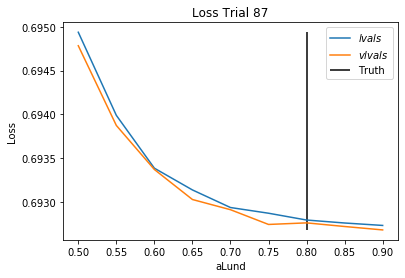

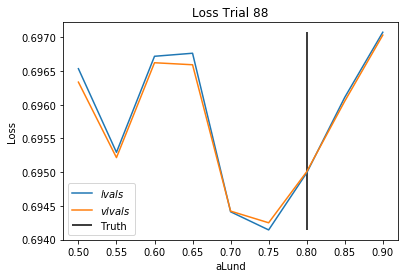

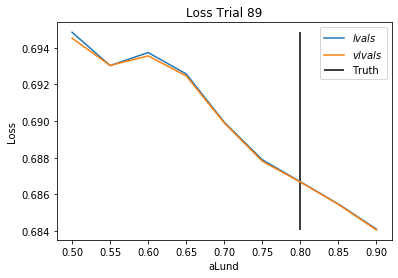

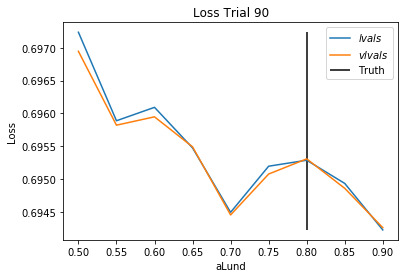

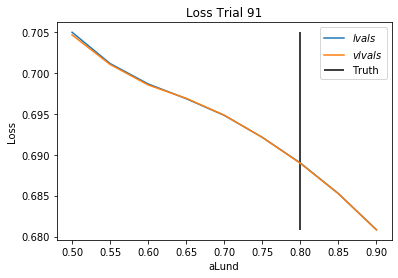

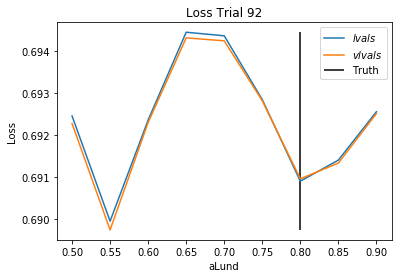

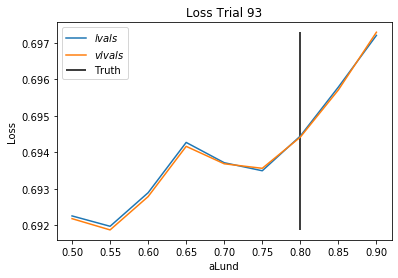

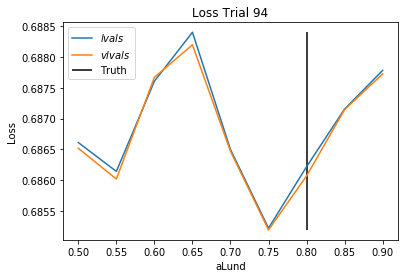

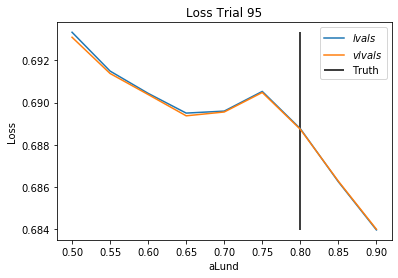

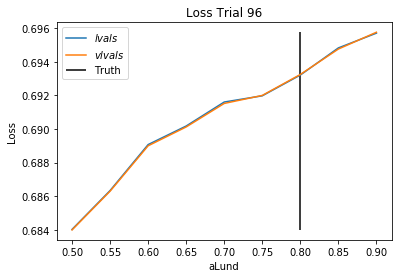

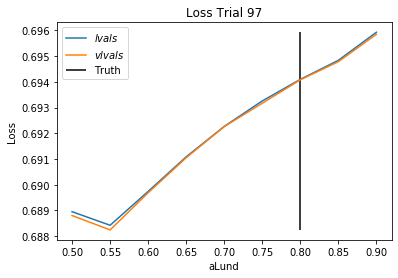

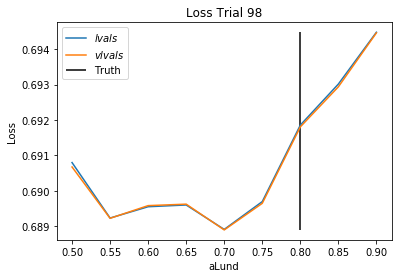

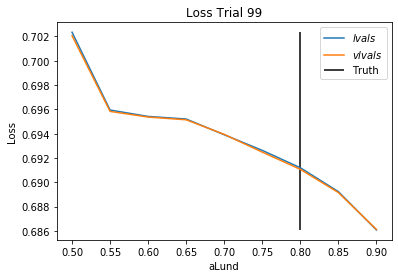

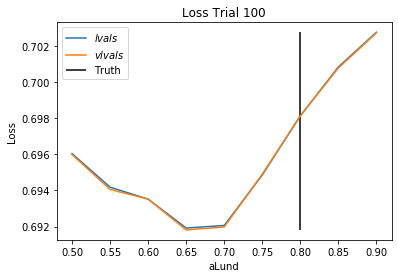

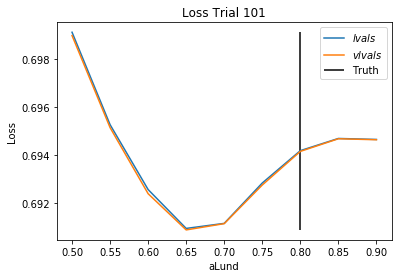

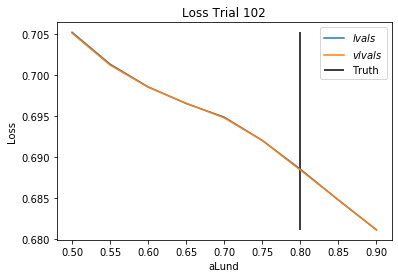

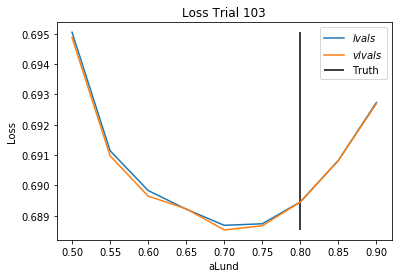

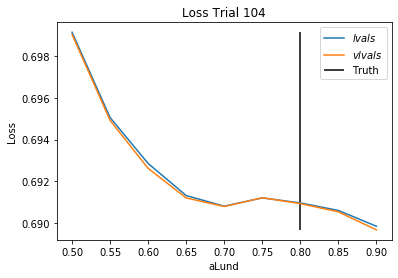

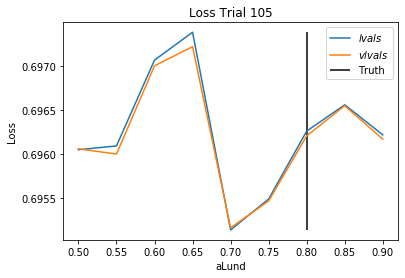

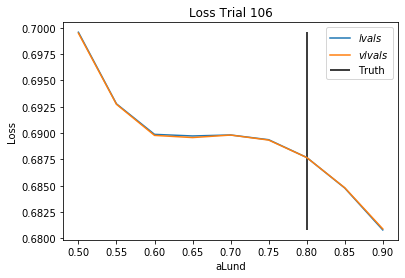

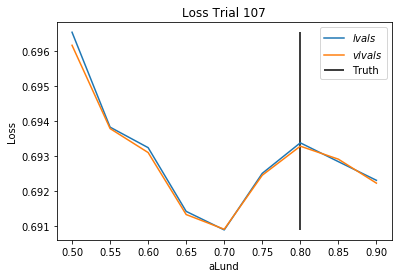

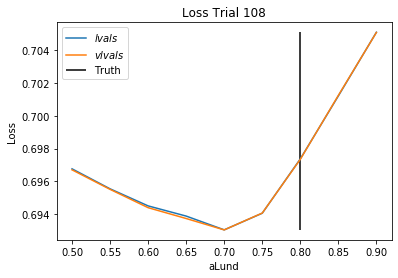

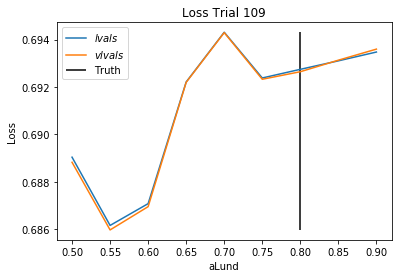

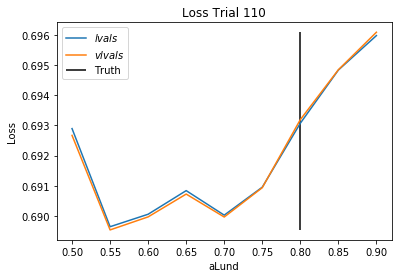

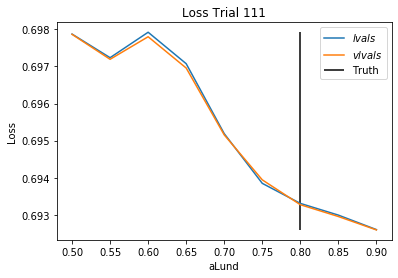

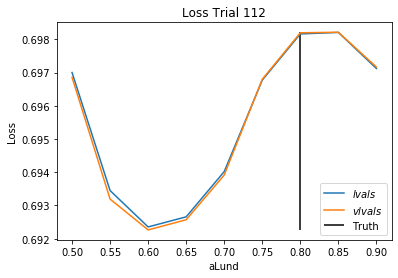

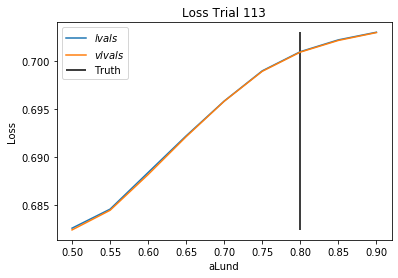

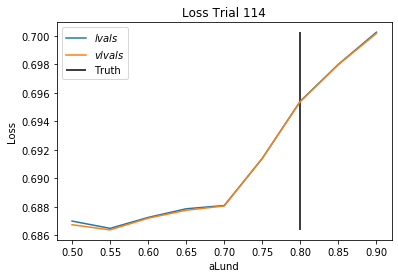

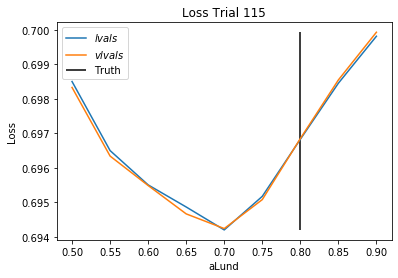

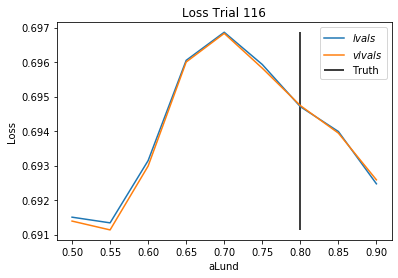

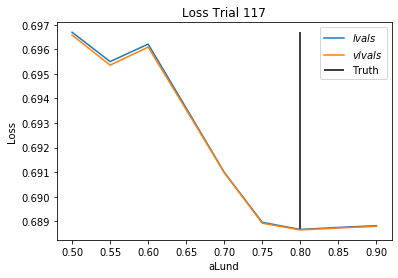

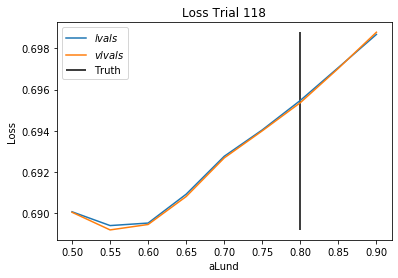

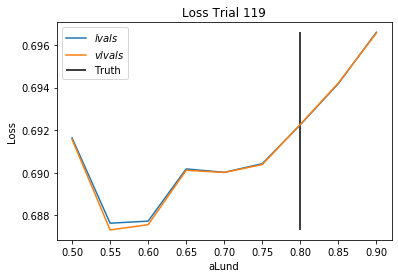

In [12]:
for index in range(120):
    plt.title("Loss Trial " + str(index))

    plt.plot(thetas, lvals[index], label='$lvals$')
    plt.plot(thetas, vlvals[index], label='$vlvals$')

    plt.vlines(
        0.8,
        min(np.concatenate([lvals[index], vlvals[index]])),
        max(np.concatenate([lvals[index], vlvals[index]])),
        label='Truth')

    plt.xlabel("aLund")
    plt.ylabel("Loss")
    plt.legend()
    # plt.savefig("aLundEnsemble-Loss-40-Run-Average.png")
    plt.show()